In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [5]:
import pickle

#### Feature Summary

| Feature | Description |
|:---------|:-------------|
| date |Date and timestamp|
|% Iron Feed |% of Iron that comes from the iron ore that is being fed into the flotation cells|
|% Silica Feed|% of silica (impurity) that comes from the iron ore that is being fed into the flotation cells|
|Starch Flow|Starch (reagent) Flow measured in m3/h|
|Amina Flow|Amina (reagent) Flow measured in m3/h|
|Ore Pulp Flow|t/h|
|Ore Pulp pH|pH scale from 0 to 14|
|Ore Pulp Density|Density scale from 1 to 3 kg/cm³|
|Flotation Column 01-07 Air Flow|Air flow that goes into the flotation cells 01 to 07 measured in Nm³/h|
|Flotation Column 01 -07  Level|Froth level in the flotation cell measured in mm (millimeters)|
|% Iron Concentrate|% of Iron which represents how much iron is presented in the end of the flotation process (0-100%, lab measurement)|
|% Silica Concentrate|% of silica which represents how much iron is presented in the end of the flotation process (0-100%, lab measurement)|

In [6]:
pd.set_option('display.max_columns', 500)

#### Load data

In [7]:
df = pd.read_csv("../data/MiningProcess_Flotation_Plant_Database.csv",decimal=",",parse_dates=["date"],infer_datetime_format=True)
df = df.drop_duplicates()

In [8]:
df.shape

(736282, 24)

In [9]:
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [10]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,281.052538,299.446217,299.914815,292.065742,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,28.571077,2.573805,3.637020,30.241329,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,292.195000,286.295000,189.928000,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,250.847000,298.257000,298.069000,260.299750,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,298.690000,299.804000,299.886000,299.486000,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,300.385000,300.635000,301.785000,303.077000,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,305.871000,310.270000,370.910000,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000


In [11]:
df.columns

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

#### Features and Targets

In [12]:

X = df.drop(['date','% Silica Concentrate'], axis=1)
y = df['% Silica Concentrate']

#### Split data for training

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Scale training data

In [14]:
x_scaler = preprocessing.MinMaxScaler()

In [15]:
X_train_scaled = x_scaler.fit_transform(X_train)

In [16]:
filename = 'scaler_lr.pkl'
pickle.dump(x_scaler, open(filename, 'wb'))

#### Train models
- __Linear Regression__

In [25]:
model_lr = LinearRegression()

In [26]:
model_lr.fit(X_train_scaled, y_train)

LinearRegression()

#### Model parameters

<center>$\hat y_{i} = \beta_{0} + \beta_{1}x_{1,i} + \beta_{2}x_{2,i}+ .... + \beta_{m}x_{m,i}$</center>
<br>where,<br> $m$ = number of training features
<br>$n$ = number of training records(rows)
<br>$\beta_{i}$ = coefficient of the $i^{th}$ feature ($ i \in 1,2,..,m$)
<br>$\beta_{0}$ = intercept

In [19]:
# Coefficients beta_i
model_lr.coef_

array([ 0.600098  ,  0.93434089, -0.1107339 ,  0.3454346 ,  0.17772878,
        0.09563917,  0.05510655, -1.01356398, -0.27748353, -0.20093573,
        0.037093  ,  0.34349447, -0.01283596,  0.22223181, -0.20212954,
       -0.09475472, -0.06500591, -0.06469466, -0.09532891, -0.10844603,
        0.08572871, -4.68643961])

In [20]:
# intercept
model_lr.intercept_

4.392826556988321

#### Evaluate model

In [21]:
# Check predictions on test dataset
X_test_scaled = x_scaler.transform(X_test)
predictions = model_lr.predict(X_test_scaled)
predictions

array([2.28632899, 1.91695412, 1.71898055, ..., 1.99712919, 2.44087717,
       2.0602908 ])

#### Model metrics

In [52]:
r2 = r2_score(y_test, predictions)
error = mean_squared_error(y_test, predictions)
print("Linear Regression")
print(f'R^2: {round(r2, 4)}\nRMSE: {round(np.sqrt(error),4)}')

Linear Regression
R^2: 0.5853
RMSE: 0.7244


#### Regularization and Feature Selection

Usually, `Linear regression` models tend to overfit the data. To overcome this, we regularize the features with penalty($\alpha$) applied to the their coeffiecients. Thiscan be done in done ways:
- LASSO Regression: Eliminates features of low importance from the model fit
- Ridge Regression: Reduces the feature weight (magnitude of the coeffient) of less important features

In [40]:
model_lasso= Lasso(alpha=0.05, max_iter=200)

In [41]:
model_lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.05, max_iter=200)

In [42]:
model_lasso.alpha

0.05

In [43]:
model_lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -3.38117444])

In [44]:
model_lasso.intercept_

4.028228275646128

In [66]:
# Check predictions on test dataset

predictions_lasso = model_lasso.predict(X_test_scaled)
predictions_lasso

array([2.07100481, 2.12773593, 1.83840724, ..., 1.9632157 , 2.51350751,
       2.51350751])

In [69]:
r2_lasso = r2_score(y_test, predictions_lasso)
error_lasso = mean_squared_error(y_test, predictions_lasso)
print('Lasso Regression')
print(f'R^2: {round(r2_lasso, 4)}\nRMSE: {round(np.sqrt(error_lasso),4)}')

Lasso Regression
R^2: 0.5853
RMSE: 0.7244


In [56]:
model_ridge = Ridge(alpha=0.9)

In [57]:
model_ridge.fit(X_train_scaled, y_train)

Ridge(alpha=0.9)

In [58]:
model_ridge.coef_

array([ 0.59893641,  0.93310989, -0.11071942,  0.34547462,  0.17772659,
        0.09562216,  0.05503945, -1.01265236, -0.27753097, -0.20170947,
        0.03712494,  0.34341286, -0.01281157,  0.22215648, -0.20207346,
       -0.09475811, -0.06498959, -0.06472283, -0.09536041, -0.10842898,
        0.08568451, -4.6861673 ])

In [59]:
model_ridge.intercept_

4.39394318578255

In [64]:
predictions_ridge = model_ridge.predict(X_test_scaled)
predictions_ridge

array([2.28633031, 1.91699024, 1.71890675, ..., 1.99716079, 2.44088247,
       2.06023799])

In [70]:
r2_ridge = r2_score(y_test, predictions_ridge)
error_ridge = mean_squared_error(y_test, predictions_ridge)
print('Ridge Regression')
print(f'R^2: {round(r2_ridge, 4)}\nRMSE: {round(np.sqrt(error_ridge),4)}')

Ridge Regression
R^2: 0.6799
RMSE: 0.6364


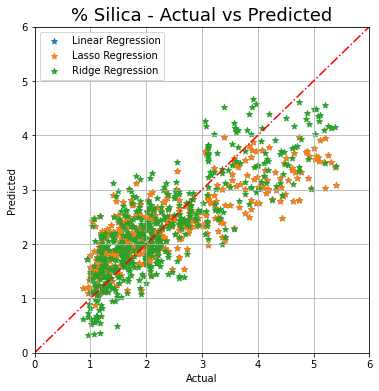

In [75]:
plt.figure(figsize=(6,6))
plt.scatter(y_test[:500],predictions[:500],marker='*', label='Linear Regression')
plt.scatter(y_test[:500],predictions_lasso[:500],marker='*', label='Lasso Regression')
plt.scatter(y_test[:500],predictions_ridge[:500],marker='*', label='Ridge Regression')
plt.axline([0, 0], [1, 1], color='red',ls='-.')
plt.legend(loc='best')
plt.xlim([0,6])
plt.ylim([0,6])
plt.grid()
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.title('% Silica - Actual vs Predicted', fontsize=18);

In [88]:
model_lr.coef_

array([ 0.600098  ,  0.93434089, -0.1107339 ,  0.3454346 ,  0.17772878,
        0.09563917,  0.05510655, -1.01356398, -0.27748353, -0.20093573,
        0.037093  ,  0.34349447, -0.01283596,  0.22223181, -0.20212954,
       -0.09475472, -0.06500591, -0.06469466, -0.09532891, -0.10844603,
        0.08572871, -4.68643961])

In [86]:
df_coeff = pd.DataFrame({'LR': model_lr.coef_, 'Lasso': model_lasso.coef_, }, columns=['Linear Regression', 'Lasso',])

In [89]:
df_coeff['Linear Regression'] = model_lr.coef_

In [91]:
df_coeff['Ridge'] = model_ridge.coef_

In [92]:
df_coeff

,Linear Regression,Lasso,Ridge
0,0.600098,-0.000000,0.598936
1,0.934341,0.000000,0.933110
2,-0.110734,-0.000000,-0.110719
3,0.345435,0.000000,0.345475
4,0.177729,0.000000,0.177727
5,0.095639,-0.000000,0.095622
6,0.055107,0.000000,0.055039
7,-1.013564,-0.000000,-1.012652
8,-0.277484,-0.000000,-0.277531
9,-0.200936,-0.000000,-0.201709


#### Save model

In [80]:
filename = 'model_lr.pkl'
pickle.dump(model_lr, open(filename, 'wb'))

In [97]:
X_test.values[0]

array([5.96600e+01, 9.09000e+00, 3.37695e+03, 5.79834e+02, 4.00488e+02,
       9.98931e+00, 1.77897e+00, 2.49390e+02, 2.49609e+02, 2.51807e+02,
       2.95096e+02, 3.06400e+02, 2.49829e+02, 2.49609e+02, 4.40930e+02,
       4.63890e+02, 4.39190e+02, 4.54690e+02, 4.60450e+02, 4.37410e+02,
       4.55750e+02, 6.55000e+01])